## Linear classifiers: SVM and Perceptron

First off, necessary packages and libraries are imported

In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data preparation
For testing the perceptron model using the iris plant dataset, the two linearly separable classes, Iris-setosa and Iris-virginica, have been chosen. Therefore Iris-versicolor is dropped from the original dataset. From the figures in the assignment, these two classes seems to be the easiest to distinguish from each other.

In [318]:
dataset = pd.read_csv('iris.csv', header=None, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
perceptron_dataset = dataset.drop(index=dataset.index[dataset['class'] == 'Iris-versicolor'])

The petal length and petal width are chosen as the features that will be used to classify the iris plants. When using the perceptron model, the attributes sepal length and sepal width are therefore dropped.

In [319]:
perceptron_dataset.drop('sepal length', axis='columns', inplace=True)
perceptron_dataset.drop('sepal width', axis='columns', inplace=True)
perceptron_dataset.reset_index(drop=True, inplace=True)

The two remaining classes are assigned binary values that are used when training and testing the perceptron model.

In [320]:
binary_dataset = perceptron_dataset.copy()
binary_dataset.loc[perceptron_dataset['class'] == 'Iris-setosa', perceptron_dataset.columns == 'class'] = 0
binary_dataset.loc[perceptron_dataset['class'] == 'Iris-virginica', perceptron_dataset.columns == 'class'] = 1
print(binary_dataset)

    petal length  petal width class
0            1.4          0.2     0
1            1.4          0.2     0
2            1.3          0.2     0
3            1.5          0.2     0
4            1.4          0.2     0
..           ...          ...   ...
95           5.2          2.3     1
96           5.0          1.9     1
97           5.2          2.0     1
98           5.4          2.3     1
99           5.1          1.8     1

[100 rows x 3 columns]


## Perceptron model

The code used in the Perceptron class is obtained from the course github, https://github.com/krayyalasomayajula/DTE2502/blob/main/boolean.py. In order to make more sense of the algorithm, more meaningful variable names have been used.

The perceptron is initialised with a set of weights and input, a learning rate and the number of iterations the algorithm will go through before it stops. Each datapoint in the input set will be subject to the activation function, which in this case returns either 1 or 0. The activation function evaluates the inequality $w \cdot x - w_0 \ge 0$ where $x \cdot w$ is the dot product between input vector $x$ and weight vector $w$, and $w_0$ is the bias term.

When training the model, the goal is to find a set of weights such that the model accurately can classify new inputs. In order to accomplish this, each time the model misclassifies an input, the weights and biases are updated according to the perceptron training rule: $w_i := w_i + \mu(t-o)x_i $ where $w_i$ is the weight associated with the feature $x_i$, $\mu$ is the learning rate and $t-o$ is the error betwen the target output $t$ and the output $o$ from the activation function. 

In [321]:
class Perceptron:
    def __init__(self, weights, dataset, learning_rate, iterations):
        self.weights = weights
        self.dataset = dataset
        self.learning_rate = learning_rate
        self.iterations = iterations
        
    def sigma(self, data_point):
        activation = self.weights[0] # bias term
        for i in range(len(data_point) - 1):
            activation += self.weights[i + 1] * data_point[i]

        return 1.0 if activation >= 0.0 else 0.0

    def training(self):
        for i in range(self.iterations):
            for data_point in self.dataset:
                activation = self.sigma(data_point)
                error = data_point[-1] - activation
            
                self.weights[0] = self.weights[0] + self.learning_rate * error

                for attribute in range(len(data_point) - 1):
                    self.weights[attribute + 1] = self.weights[attribute + 1] + self.learning_rate * error * data_point[attribute]

    def predict(self, test_dataset):
        predictions = []
        for data_point in test_dataset:
            predictions.append(self.sigma(data_point))
        return predictions

## Plotting the decision boundary and testing the perceptron model

The decision boundary in this perceptron model with features $x_1$ and $x_2$, and weights $w_1$ and $w_2$ is given by equation $w_1x_1 + w_2x_2 + w_0 = 0$ as this is the point at which the sign function will make a turn. Solving this for $x_2$ gives us $x_2 = -\frac{w_0}{w_2} - \frac{w_1}{w_2}x_1$. If one plots this with respect to $x_2$ on the y-axis, one can interpret this equation as the linear equation $y = ax + b$, where $a = -\frac{w_1}{w_2}$ and  $b = -\frac{w_0}{w_2}$

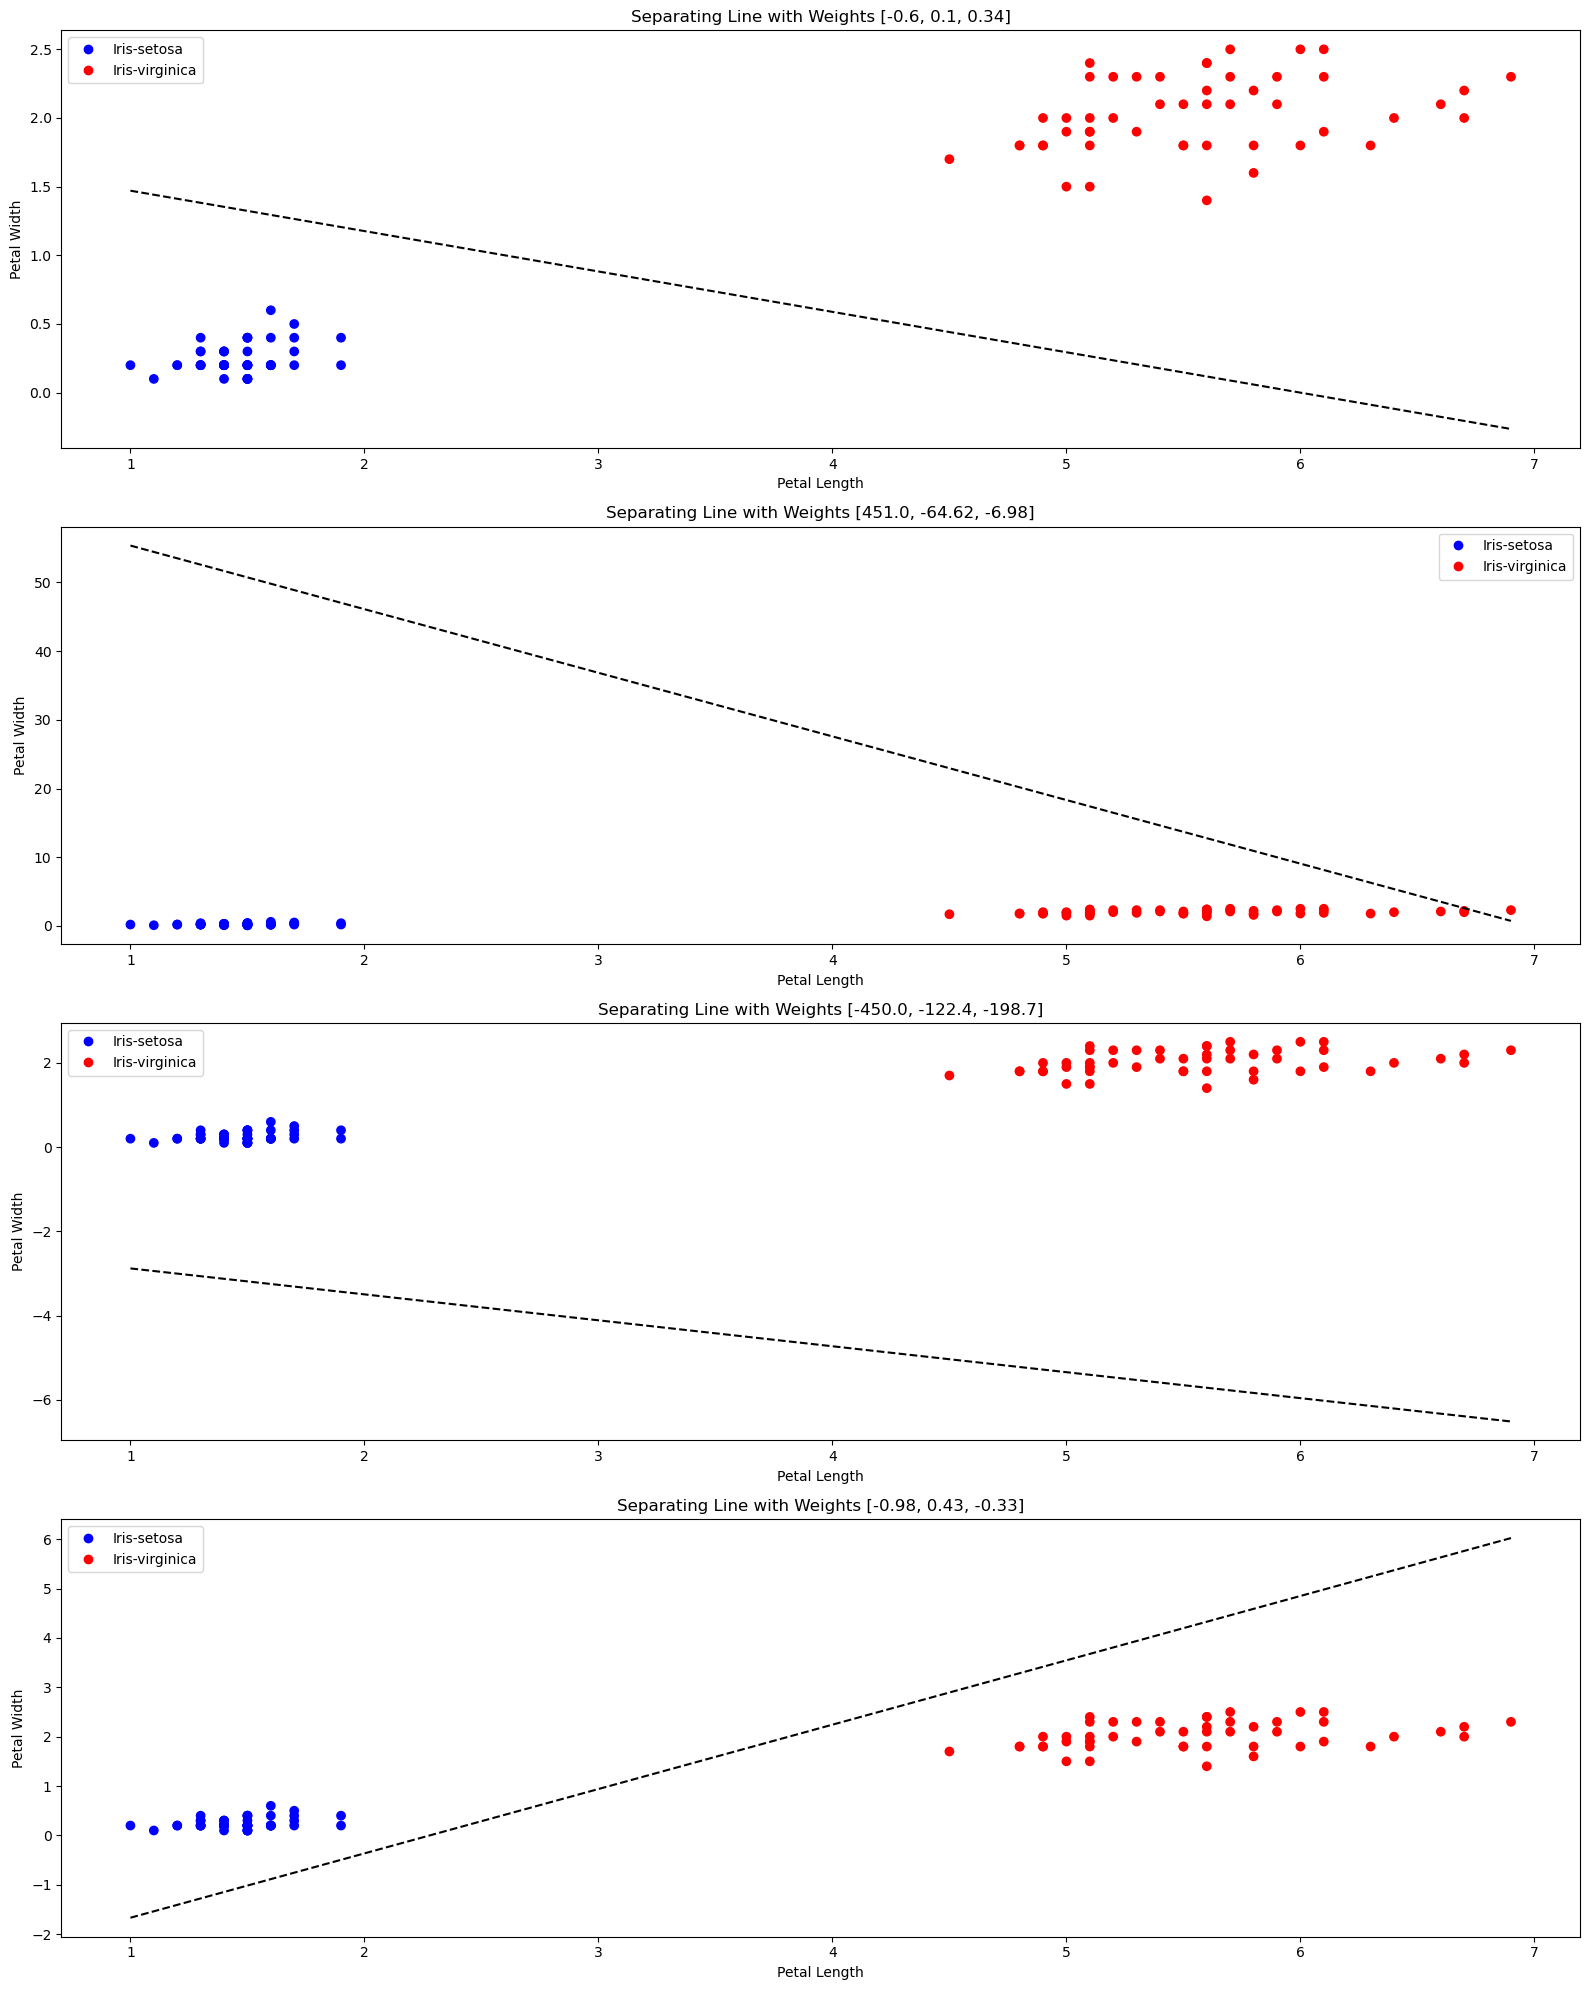

In [322]:

initial_weights_list = [
    [0, 0, 0],
    [500, 2, 3],
    [-500, -400, -300],
    [0.02, -0.03, -1.05],
]

perceptron_dataset = binary_dataset[['petal length', 'petal width', 'class']].values.tolist()

fig, axs = plt.subplots(len(initial_weights_list), figsize=(16, 5 * len(initial_weights_list)))

for i, initial_weights in enumerate(initial_weights_list):
    perceptron = Perceptron(initial_weights, perceptron_dataset, learning_rate=0.2, iterations=5)
    perceptron.training()

    petal_length = binary_dataset['petal length'].values.tolist()
    petal_width = binary_dataset['petal width'].values.tolist()

    scatter = axs[i].scatter(
        petal_length, 
        petal_width, 
        c=binary_dataset['class'], 
        cmap='bwr', 
        label='Classified Data'
    )

    legend_labels = {
        0: 'Iris-setosa',
        1: 'Iris-virginica'
    }

    try: 
        a = -perceptron.weights[1] / perceptron.weights[2]
        b = -perceptron.weights[0] / perceptron.weights[2]
    except ZeroDivisionError:
        a = 0
        b = 0

    x_values = np.linspace(min(petal_length), max(petal_length), 100)
    y = a * x_values + b

    axs[i].plot(x_values, y, 'k--', label='Separating Line')
    axs[i].set_xlabel('Petal Length')
    axs[i].set_ylabel('Petal Width')
    axs[i].set_title(f'Separating Line with Weights {[round(weight, 2) for weight in perceptron.weights]}')
    axs[i].legend(handles=scatter.legend_elements()[0], labels=legend_labels.values())

plt.tight_layout()
plt.show()

From testing the perceptron model using different initial weights, one finds that very high or very low initial weights, seems to give a decicion boundary that is very off. It seems that one should pick values closer to zero. As the finial initial weights, the weights [0.02, -0.03, -1.05] are picked, these are the very same weights used in the implementation of boolean OR in the course GitHub repository.

## Support Vector Machine

Based on this SVM-implementation on GitHub, https://github.com/krayyalasomayajula/DTE2502/blob/main/SVM_code/SVM.ipynb. Through trial and error, it was managed to adapt it to the iris dataset.

In [323]:
class SVM:
    def __init__(self, learning_rate=1e-3, lambda_param=1e-2, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def _init_weights_bias(self, X):
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0

    def _get_cls_map(self, y):
        return np.where(y <= 0, -1, 1)

    def _satisfy_constraint(self, x, idx):
        linear_model = np.dot(x, self.w) + self.b 
        return self.cls_map[idx] * linear_model >= 1
    
    def _get_gradients(self, constrain, x, idx):
        if constrain:
            dw = self.lambda_param * self.w
            db = 0
            return dw, db
        
        dw = self.lambda_param * self.w - np.dot(self.cls_map[idx], x)
        db = - self.cls_map[idx]
        return dw, db
    
    def _update_weights_bias(self, dw, db):
        self.w -= self.lr * dw
        self.b -= self.lr * db
    
    def fit(self, X, y):
        self._init_weights_bias(X)
        self.cls_map = self._get_cls_map(y)

        for _ in range(self.n_iters):
            for idx, x in enumerate(X):
                constrain = self._satisfy_constraint(x, idx)
                dw, db = self._get_gradients(constrain, x, idx)
                self._update_weights_bias(dw, db)
    
    def predict(self, X):
        estimate = np.dot(X, self.w) + self.b
        prediction = np.sign(estimate)
        return np.where(prediction == -1, 0, 1)

## Comparing the Perceptron with the Support Vector Machine

When using the Support Vector Machine, all the features of the plants are used for classification, therefore datasets containing all features are defined - still it is only classified between Iris setosa and Iris virginica.

In [324]:
SVM_dataset = dataset.drop(index=dataset.index[dataset['class'] == 'Iris-versicolor'])
SVM_dataset.loc[SVM_dataset['class'] == 'Iris-setosa', SVM_dataset.columns == 'class'] = 0
SVM_dataset.loc[SVM_dataset['class'] == 'Iris-virginica', SVM_dataset.columns == 'class'] = 1
SVM_dataset.reset_index(drop=True, inplace=True)

svm_dataset_features = SVM_dataset[['sepal length', 'sepal width', 'petal length', 'petal width']]
svm_dataset_targets = SVM_dataset['class']
svm_dataset_features = svm_dataset_features.values
svm_dataset_targets = svm_dataset_targets.values

From evaluating the two models, it seems clear that both of them are able to accurately classify between Iris-setosa and Iris-virginica. While the SVM aims to maximise the margin between the two iris plants, the perceptron model only finds a line (hyperplane) that separates them. In general, the SVM allows for more classification errors, while the weight vector is updated for every error in the perceptron model, though in this case this doesn't seem to affect the performance.

Both the SVM and Perceptron model perform well on the dataset, but when it comes to implementation, the perceptron model seems way less complex and therefore probably easier for a beginner to understand.

In [325]:
def evaluate_model(target_value, predicted_value):
    sum = 0
    for i in range(len(target_value)):
        if target_value[i] == predicted_value[i]:
            sum += 1
    accuracy = sum/len(target_value)
    return accuracy


svm = SVM(n_iters=15)
svm.fit(svm_dataset_features, svm_dataset_targets)

predictions = svm.predict(svm_dataset_features)

acc = evaluate_model(svm_dataset_targets, predictions)
print(f"SVM Classifier Accuracy: {acc:.2f}")

predictions = perceptron.predict(perceptron_dataset)

list_of_y_values = []
for data_point in perceptron_dataset:
    list_of_y_values.append(data_point[-1])


acc = evaluate_model(list_of_y_values, predictions)
print(f"Perceptron Accuracy: {acc:.2f}")

SVM Classifier Accuracy: 1.00
Perceptron Accuracy: 1.00
